In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, multilabel_confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve


import warnings
warnings.filterwarnings('ignore')

## 1. Problem Statement

To Predict patient is having diabetes or not by using required parameters

Glucose	
BloodPressure	
SkinThickness	
Insulin	
BMI	
DiabetesPedigreeFunction	
Age	

## 2. Data Gathering

In [2]:
df_diab = pd.read_csv('diabetes.csv')
df_diab

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,52,1
3,150,66,23,94,28.1,0.167,21,0
4,150,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


## 3. EDA

In [3]:
df_diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [4]:
df_diab.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,121.117188,69.076823,20.536458,79.799479,31.992578,0.471876,33.243490,0.348958
std,31.805091,19.367794,15.952218,115.244002,7.884160,0.331329,11.758182,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,142.000000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### 3.1 Glucose

<AxesSubplot:xlabel='Glucose'>

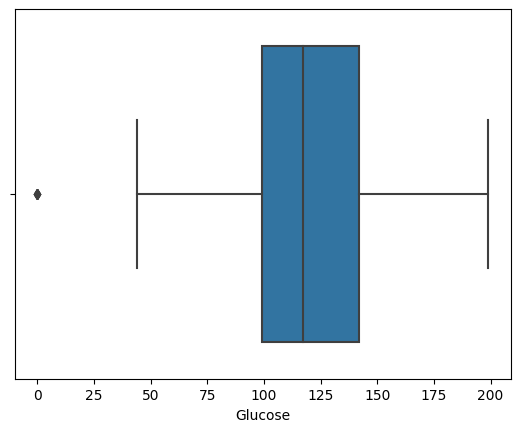

In [5]:
sns.boxplot(df_diab['Glucose'])

<AxesSubplot:>

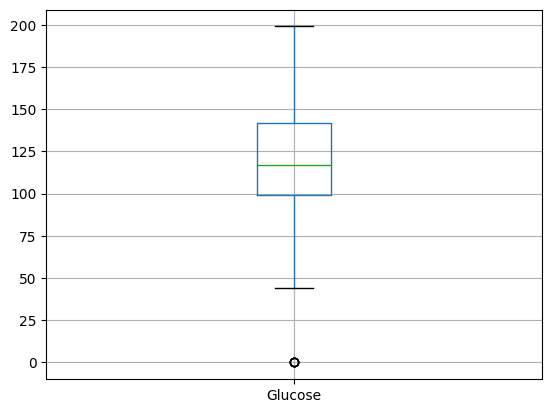

In [6]:
df_diab[['Glucose']].boxplot()

In [7]:
df_diab['Glucose'] = np.where(df_diab['Glucose']< 25, df_diab['Glucose'].mean(), df_diab['Glucose'])

### 3.2 BloodPressure

<AxesSubplot:xlabel='BloodPressure'>

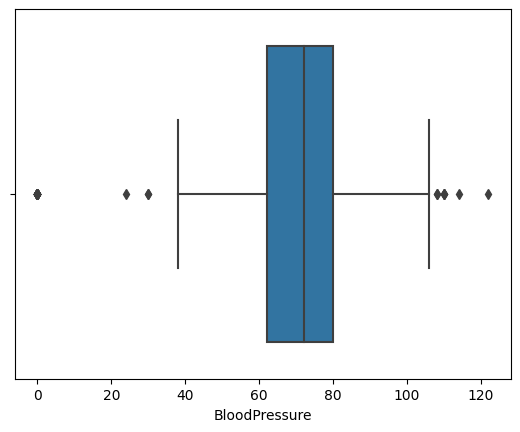

In [8]:
sns.boxplot(df_diab['BloodPressure'])

In [9]:
df_diab[~df_diab['BloodPressure'].between(35,105)].shape

(48, 8)

In [10]:
df_diab['BloodPressure'] = np.where(~df_diab['BloodPressure'].between(35,105), df_diab['BloodPressure'].mean(), 
                                    df_diab['BloodPressure'])

<AxesSubplot:xlabel='BloodPressure'>

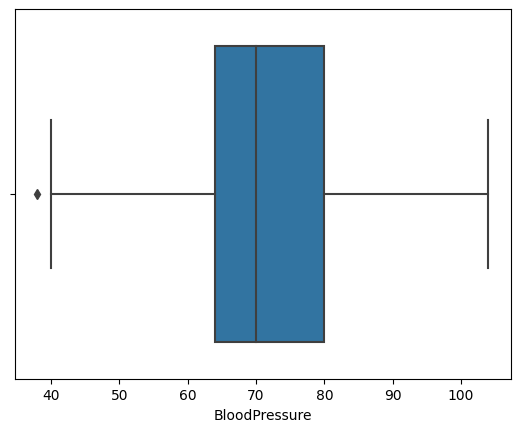

In [11]:
sns.boxplot(df_diab['BloodPressure'])

### 3.3 SkinThickness

<AxesSubplot:xlabel='SkinThickness'>

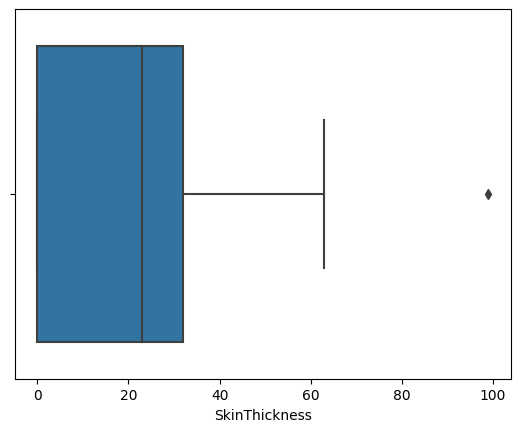

In [12]:
sns.boxplot(df_diab['SkinThickness'])

In [13]:
df_diab['SkinThickness'] = np.where(df_diab['SkinThickness']> 65, df_diab['SkinThickness'].mean(), df_diab['SkinThickness'])

### 3.4 Insulin

<AxesSubplot:xlabel='Insulin'>

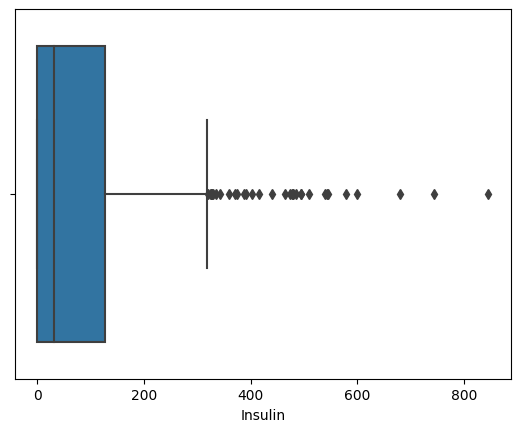

In [14]:
sns.boxplot(df_diab['Insulin'])

In [15]:
df_diab[df_diab['Insulin']>325].shape

(30, 8)

In [16]:
df_diab['Insulin'] = np.where(df_diab['Insulin']>=325, df_diab['Insulin'].mean(), df_diab['Insulin'])

### 3.5 BMI

<AxesSubplot:xlabel='BMI'>

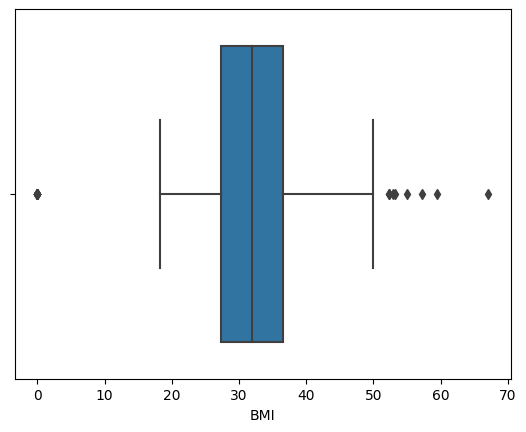

In [17]:
sns.boxplot(df_diab['BMI'])

In [18]:
df_diab['BMI'] = np.where(~df_diab['BMI'].between(15,50), df_diab['BMI'].mean(), 
                                    df_diab['BMI'])

### 3.6 DiabetesPedigreeFunction

<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

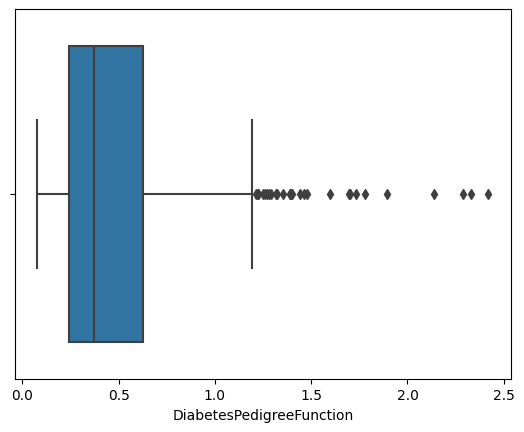

In [19]:
sns.boxplot(df_diab['DiabetesPedigreeFunction'])

In [20]:
df_diab['DiabetesPedigreeFunction'] = np.where(df_diab['DiabetesPedigreeFunction']>=1.2, 
                                               df_diab['DiabetesPedigreeFunction'].mean(), df_diab['DiabetesPedigreeFunction'])

### 3.7 Age

<AxesSubplot:xlabel='Age'>

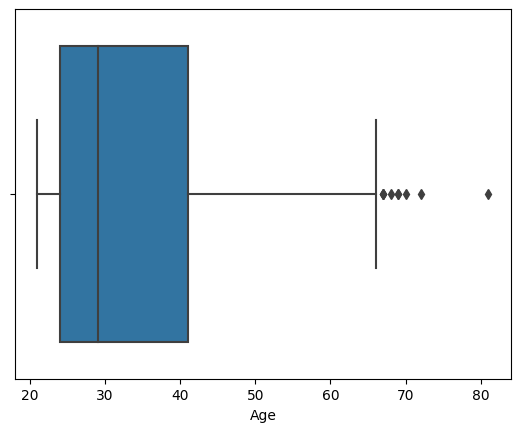

In [21]:
sns.boxplot(df_diab['Age'])

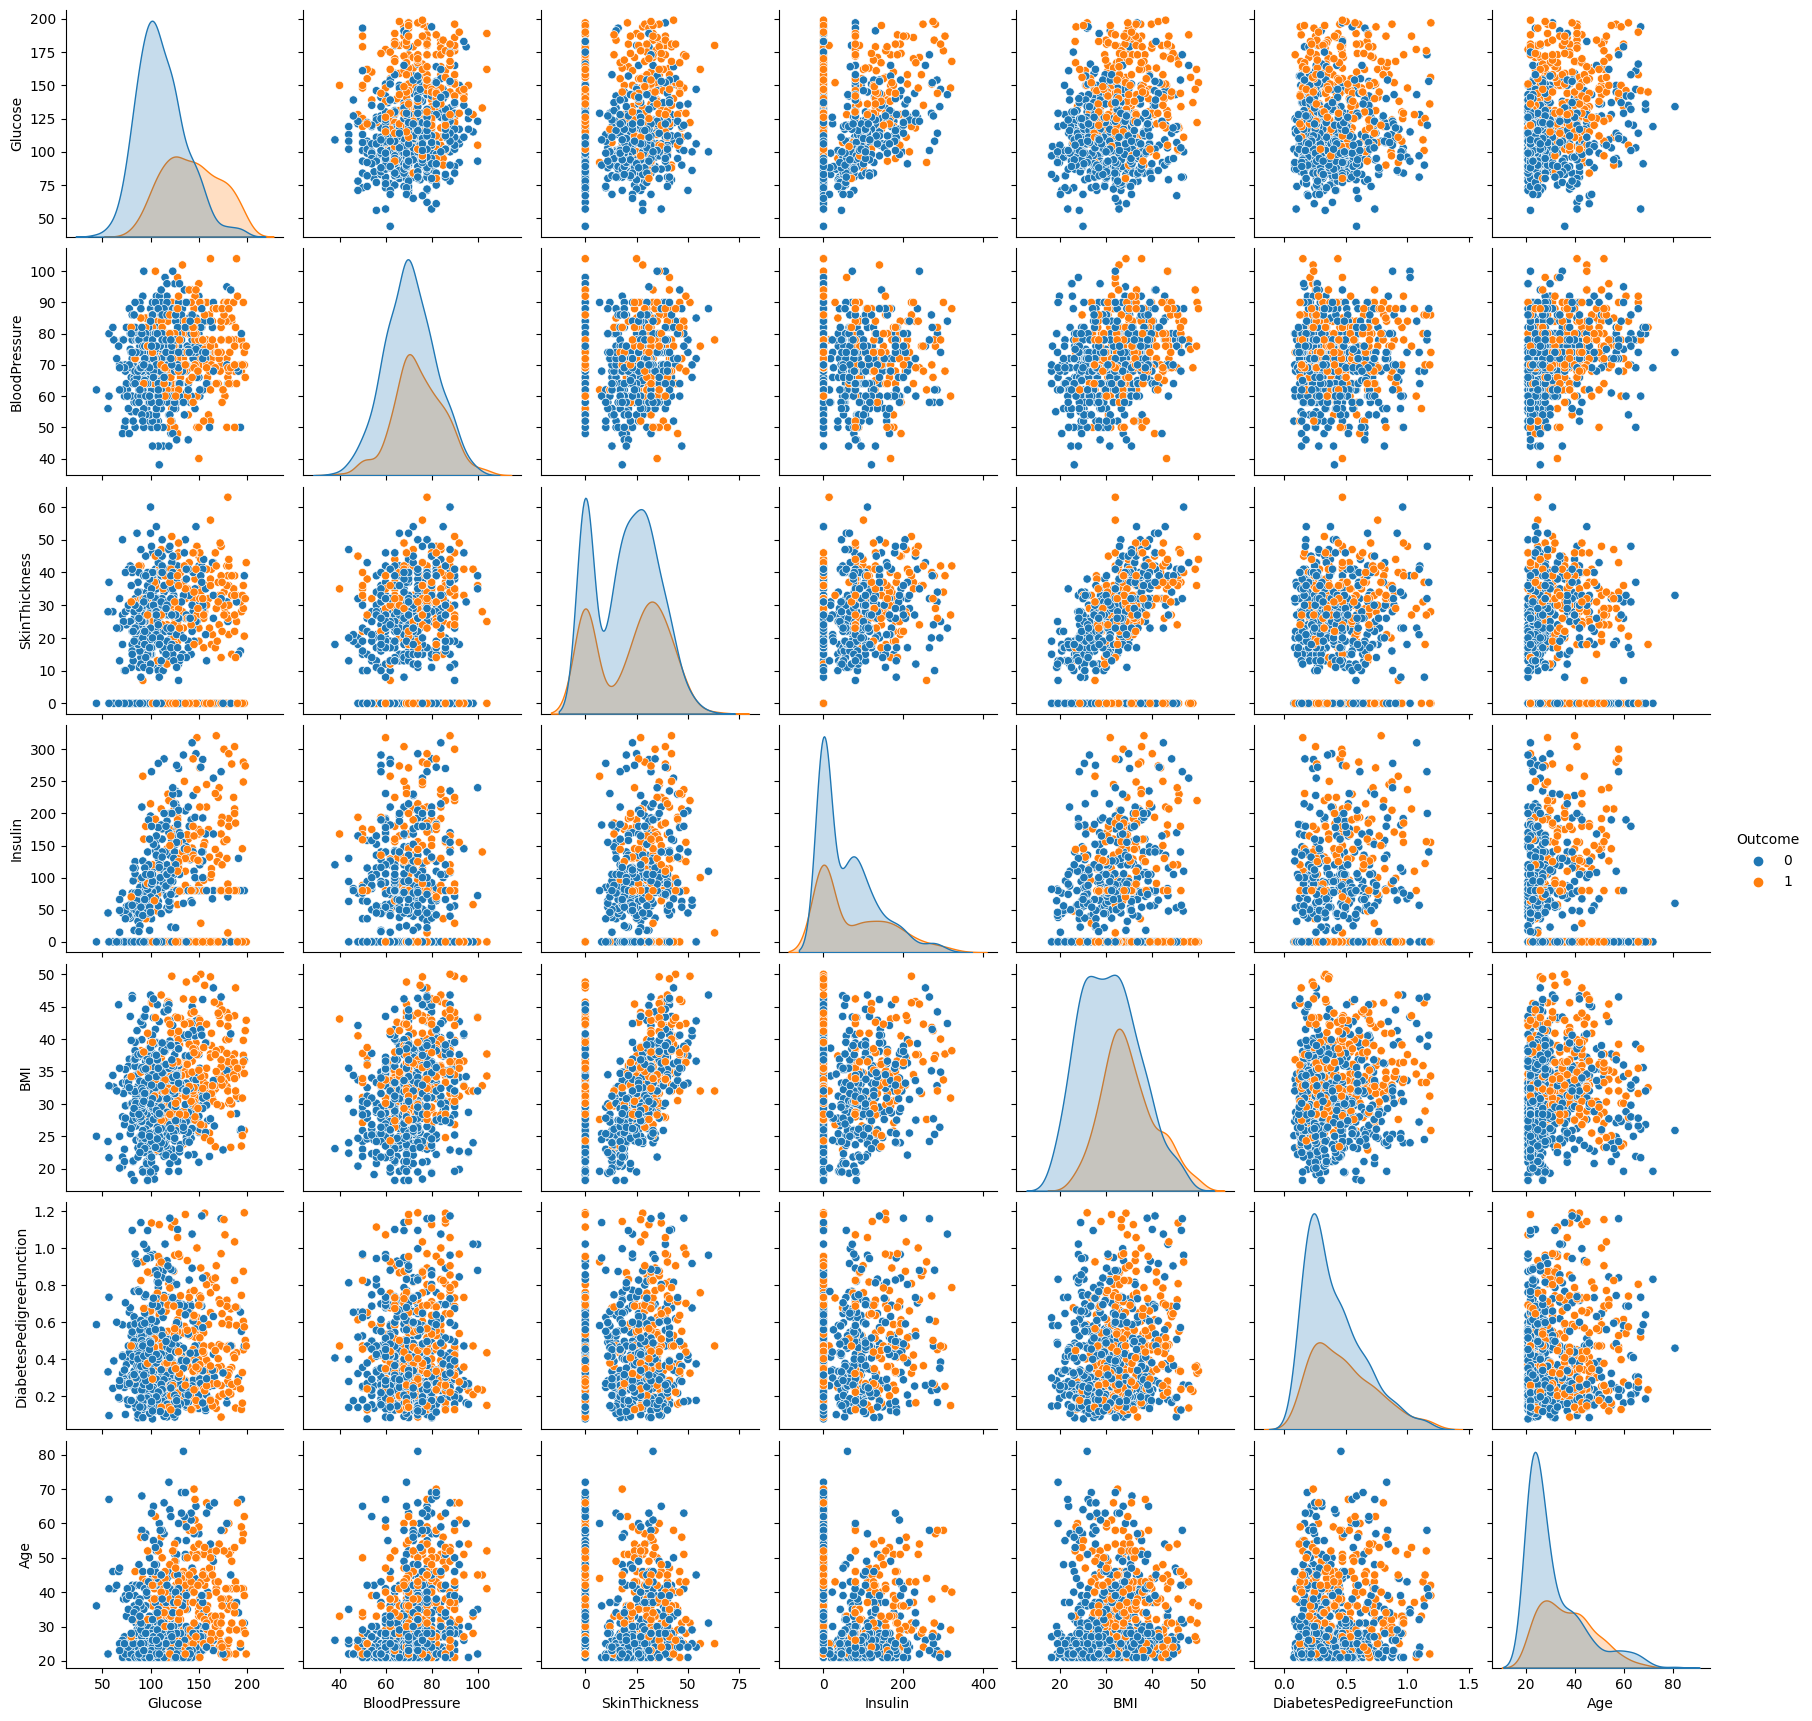

In [22]:
sns.pairplot(df_diab, hue = 'Outcome')

In [23]:
df_diab['Age'] = np.where(df_diab['Age']>=66, df_diab['Age'].mean(), df_diab['Age'])

## 4. Feature Engineering

## 5. Feature Selection

#### VIF

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [25]:
x = df_diab.drop('Outcome', axis = 1)
x

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148.0,50.0,35.0,0.0,33.6,0.627000,50.0
1,85.0,66.0,29.0,0.0,26.6,0.351000,31.0
2,183.0,64.0,0.0,0.0,23.3,0.672000,52.0
3,150.0,66.0,23.0,94.0,28.1,0.167000,21.0
4,150.0,40.0,35.0,168.0,43.1,0.471876,33.0
...,...,...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9,0.171000,63.0
764,122.0,70.0,27.0,0.0,36.8,0.340000,27.0
765,121.0,72.0,23.0,112.0,26.2,0.245000,30.0
766,126.0,60.0,0.0,0.0,30.1,0.349000,47.0


In [26]:
variance_inflation_factor(x.values, 1)

34.059945872675016

<AxesSubplot:>

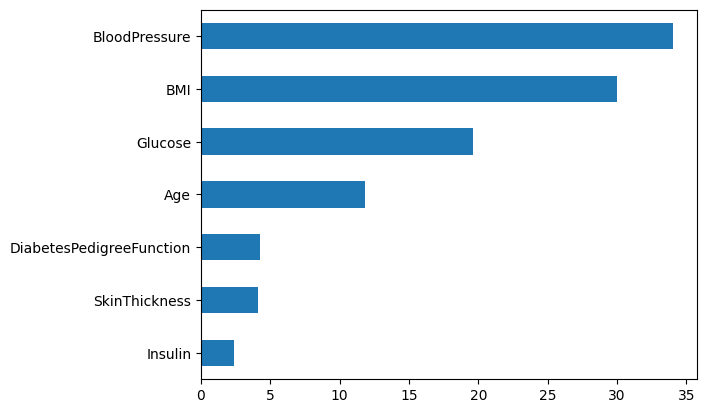

In [27]:
vif_list = []

for i in range(x.shape[1]):
    vif = variance_inflation_factor(x.values, i)
    vif_list.append(round(vif, 2))
    
s1 = pd.Series(vif_list, index=x.columns)
s1.sort_values().plot(kind = 'barh')

In [28]:
df_diab.corr().tail(1)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Outcome,0.489582,0.160155,0.067066,0.095536,0.300611,0.159691,0.2667,1.0


In [29]:
df_diab['Outcome'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

## 6. Model Training

### Train Test Split

In [30]:
x = df_diab.drop('Outcome', axis = 1)
y = df_diab['Outcome']

In [31]:
y.value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [32]:
y.value_counts(normalize=False)

0    500
1    268
Name: Outcome, dtype: int64

In [33]:
268/500

0.536

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2, stratify=y)

In [35]:
268*0.8

214.4

Training >> 80%
Testing >> 20%

In [36]:
y_test.value_counts(normalize=True)

0    0.649351
1    0.350649
Name: Outcome, dtype: float64

In [37]:
y_train.value_counts(normalize=True)

0    0.651466
1    0.348534
Name: Outcome, dtype: float64

In [38]:
x_train.shape

(614, 7)

### Model Instantiation

In [39]:
log_clf = LogisticRegression()
log_clf.fit(x_train, y_train)

LogisticRegression()

## Evaluation

In [40]:
def evaluate_model(model, ind_var, act):
    pred = model.predict(ind_var)
    
    acc_score = accuracy_score(act, pred)
    print('Accuracy Score :', acc_score)
    print('***'*20)
    
    cnf_matrix = confusion_matrix(act, pred)
    print('Confusion Matrix : \n', cnf_matrix)
    print('***'*20)
    
    clf_report = classification_report(act, pred)
    print('Classification Report : \n', clf_report)
    print('***'*20)
    
    return pred

print('Testing Data Evaluation'.center(60, '*'))
y_pred = evaluate_model(log_clf, x_test, y_test)

******************Testing Data Evaluation*******************
Accuracy Score : 0.7597402597402597
************************************************************
Confusion Matrix : 
 [[89 11]
 [26 28]]
************************************************************
Classification Report : 
               precision    recall  f1-score   support

           0       0.77      0.89      0.83       100
           1       0.72      0.52      0.60        54

    accuracy                           0.76       154
   macro avg       0.75      0.70      0.72       154
weighted avg       0.75      0.76      0.75       154

************************************************************


0 >> neg
1 >> pos

y_test.value_counts()

TN  FP
FN  TP

     0   1
0   89  11
1   26  28

acc = (89+28)/154
acc

In [42]:
precision = 28/(28+11)    # Precision for class 1
precision

0.717948717948718

In [43]:
precision = 89/(89+26)    # Precision for class 0
precision

0.7739130434782608

In [44]:
recall = 28/(28+26)    # Recall for class 1
recall

0.5185185185185185

In [45]:
recall = 89/(89+11)    # Recall for class 0
recall

0.89

In [46]:
f1  = (2*0.72*0.52)/(0.72+0.52)   # f1 for class 1
f1

0.6038709677419355

In [47]:
f1  = (2*0.77*0.89)/(0.77+0.89)   # f1 for class 1
f1

0.8256626506024096

In [48]:
print('Training Data Evaluation'.center(60, '*'))
y_pred_train = evaluate_model(log_clf, x_train, y_train)

******************Training Data Evaluation******************
Accuracy Score : 0.7801302931596091
************************************************************
Confusion Matrix : 
 [[350  50]
 [ 85 129]]
************************************************************
Classification Report : 
               precision    recall  f1-score   support

           0       0.80      0.88      0.84       400
           1       0.72      0.60      0.66       214

    accuracy                           0.78       614
   macro avg       0.76      0.74      0.75       614
weighted avg       0.78      0.78      0.77       614

************************************************************


## Macro Avg

Macro avg >> Treat every class equally

Balanced data

if working with imbalance data >> all classes are eqaully important

Calculates arithmatic mean(simple mean)
It uses f1 score

In [49]:
(0.84+0.66)/2

0.75

## Weighted Avg

Weighted Avg >> Imbalance Data

if working with imbalance data >> where classes need to be given more weights

      f1      support     support proportion     weighted avg
0    0.84       400             0.65                
1    0.66       214             0.35              (0.84*0.65) + (0.66*0.35)

In [50]:
400/614

0.6514657980456026

In [51]:
214/614

0.3485342019543974

In [52]:
(0.84*0.65) + (0.66*0.35)

0.777

<AxesSubplot:>

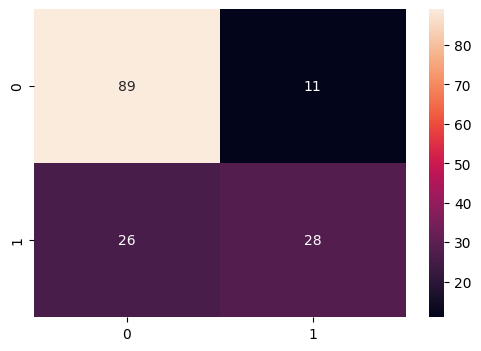

In [53]:
plt.figure(figsize=(6,4))
cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cnf_matrix,annot=True)

<Figure size 600x400 with 0 Axes>

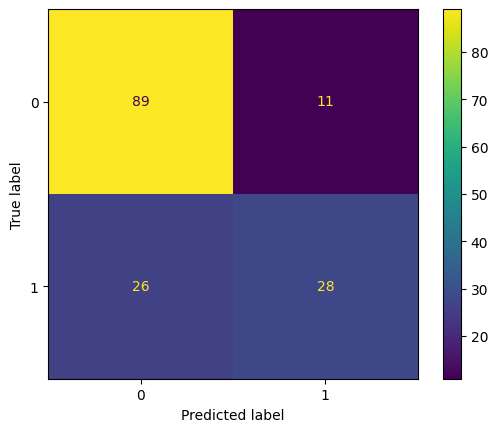

In [54]:
plt.figure(figsize=(6,4))
plot_confusion_matrix(log_clf,x_test, y_test)

## AUC ROC Curve

In [55]:
y_pred_proba = log_clf.predict_proba(x_test)
y_pred_proba

array([[0.92501474, 0.07498526],
       [0.94262635, 0.05737365],
       [0.20384269, 0.79615731],
       [0.33348593, 0.66651407],
       [0.8901539 , 0.1098461 ],
       [0.88445247, 0.11554753],
       [0.89839421, 0.10160579],
       [0.30396574, 0.69603426],
       [0.78533151, 0.21466849],
       [0.56494844, 0.43505156],
       [0.01963753, 0.98036247],
       [0.56351532, 0.43648468],
       [0.65977319, 0.34022681],
       [0.30489772, 0.69510228],
       [0.41996835, 0.58003165],
       [0.15325689, 0.84674311],
       [0.89614705, 0.10385295],
       [0.85982107, 0.14017893],
       [0.93366139, 0.06633861],
       [0.73991351, 0.26008649],
       [0.4810744 , 0.5189256 ],
       [0.84120333, 0.15879667],
       [0.43734682, 0.56265318],
       [0.31076717, 0.68923283],
       [0.98400456, 0.01599544],
       [0.75624538, 0.24375462],
       [0.47973682, 0.52026318],
       [0.17032388, 0.82967612],
       [0.53507771, 0.46492229],
       [0.30740789, 0.69259211],
       [0.

In [56]:
y_pred[:10]

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0], dtype=int64)

thresh = 0.5
             0           1
       [0.92501474, 0.07498526],  >>   Class 0
       [0.94262635, 0.05737365],  >>   class 0
       [0.20384269, 0.79615731],  >>   class 1
       [0.33348593, 0.66651407],
       [0.8901539 , 0.1098461 ],
       [0.88445247, 0.11554753],
       [0.89839421, 0.10160579],
       [0.30396574, 0.69603426],
       [0.78533151, 0.21466849],   >> class 0
       [0.56494844, 0.43505156],    >> class 0
       [0.01963753, 0.98036247],    >> class 1
       [0.56351532, 0.43648468],
       [0.65977319, 0.34022681]

thresh = 0.6
             0           1
       [0.92501474, 0.07498526],  >>   Class 0
       [0.94262635, 0.05737365],  >>   class 0
       [0.20384269, 0.79615731],  >>   class 1
       [0.33348593, 0.66651407],
       [0.8901539 , 0.1098461 ],
       [0.88445247, 0.11554753],
       [0.89839421, 0.10160579],
       [0.30396574, 0.69603426],
       [0.78533151, 0.21466849],   >> class 0
       [0.56494844, 0.43505156],    >> class 0
       [0.01963753, 0.98036247],    >> class 1
       [0.56351532, 0.43648468],
       [0.65977319, 0.34022681]

In [59]:
y_pred_proba[:,1]

array([0.07498526, 0.05737365, 0.79615731, 0.66651407, 0.1098461 ,
       0.11554753, 0.10160579, 0.69603426, 0.21466849, 0.43505156,
       0.98036247, 0.43648468, 0.34022681, 0.69510228, 0.58003165,
       0.84674311, 0.10385295, 0.14017893, 0.06633861, 0.26008649,
       0.5189256 , 0.15879667, 0.56265318, 0.68923283, 0.01599544,
       0.24375462, 0.52026318, 0.82967612, 0.46492229, 0.69259211,
       0.32942711, 0.15591061, 0.09153814, 0.80944312, 0.22623452,
       0.32439712, 0.04209535, 0.16336861, 0.05083842, 0.05209139,
       0.56408726, 0.22928109, 0.29127646, 0.67544952, 0.27170104,
       0.36131788, 0.4448344 , 0.19718762, 0.01727968, 0.21261622,
       0.28678233, 0.13973618, 0.64015614, 0.09792616, 0.7653757 ,
       0.36821717, 0.07295755, 0.03882481, 0.37198979, 0.07175145,
       0.1760807 , 0.08836895, 0.21432593, 0.22152499, 0.61705755,
       0.40415353, 0.19438742, 0.6903295 , 0.64660859, 0.0781696 ,
       0.66950985, 0.21710817, 0.68448434, 0.09192016, 0.89660

In [60]:
fpr, tpr, thresh = roc_curve(y_test, y_pred_proba[:,1])
thresh

array([1.98036247, 0.98036247, 0.94637112, 0.94121338, 0.80944312,
       0.79615731, 0.69603426, 0.69259211, 0.68923283, 0.68448434,
       0.64709213, 0.64015614, 0.58615485, 0.58003165, 0.52026318,
       0.5189256 , 0.49235937, 0.46268402, 0.45740765, 0.43648468,
       0.43505156, 0.41726026, 0.40415353, 0.38218381, 0.37198979,
       0.36821717, 0.33099642, 0.32942711, 0.32439712, 0.31376482,
       0.29186308, 0.29127646, 0.29002616, 0.27170104, 0.26008649,
       0.22623452, 0.22172498, 0.21466849, 0.21317128, 0.20309043,
       0.20305101, 0.19718762, 0.19504735, 0.17721604, 0.1760807 ,
       0.17137687, 0.17131355, 0.16336861, 0.1593965 , 0.15591061,
       0.1451392 , 0.14428682, 0.1425914 , 0.13376256, 0.12544488,
       0.1098461 , 0.10450872, 0.01151765])

## ROC Curve

Text(0, 0.5, 'True Positive Rate')

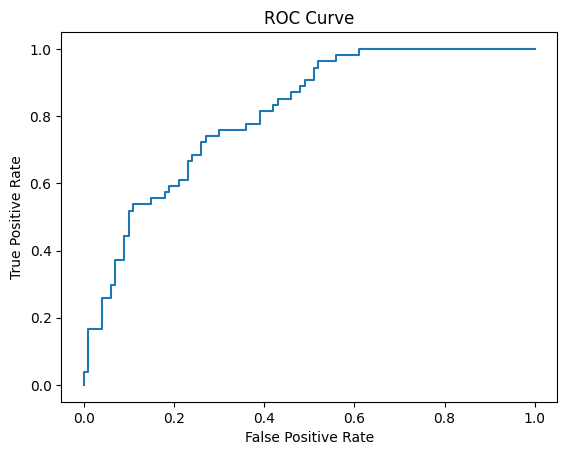

In [61]:
plt.title('ROC Curve')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [62]:
auc_score = roc_auc_score(y_test, y_pred_proba[:,1])
auc_score

0.807037037037037

In [63]:
# Prob to belonging to 1
value_pred = []

for i in y_pred_proba[:,1]:
    if i >=0.6:
        value_pred.append(1)
        
    else:
        value_pred.append(0)

In [64]:
arr = np.array(value_pred)

confusion_matrix(y_test, value_pred)

array([[91,  9],
       [31, 23]], dtype=int64)

In [65]:
# Prob to belonging to 1
value_pred = []

for i in y_pred_proba[:,1]:
    if i >=0.45:
        value_pred.append(1)
        
    else:
        value_pred.append(0)
        
arr = np.array(value_pred)

confusion_matrix(y_test, value_pred)

array([[85, 15],
       [24, 30]], dtype=int64)

In [69]:
y_pred_proba[22:23]

array([[0.43734682, 0.56265318]])

In [72]:
result = y_pred_proba[22:23]
result[0,1]

0.5626531790669493

In [73]:
def get_pred_class(threshold, result):
    prob = result[0,1]
    if prob >= threshold:
        return 'Class1'
    
    else:
        return 'Class0'
    
result = y_pred_proba[22:23]

threshold = 0.5
pred_class = get_pred_class(threshold, result)
print('Predicted Class is:', pred_class)

Predicted Class is: Class1


In [75]:
def get_pred_class(threshold, result):
    prob = result[0,1]
    if prob >= threshold:
        return 'Class1'
    
    else:
        return 'Class0'
    
result = y_pred_proba[22:23]

threshold = 0.6
pred_class = get_pred_class(threshold, result)
print('Predicted Class is:', pred_class)

Predicted Class is: Class0


In [77]:
x.head(1)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148.0,50.0,35.0,0.0,33.6,0.627,50.0


In [80]:
Glucose = 145.0
BloodPressure = 55.0
SkinThickness = 35.0
Insulin = 0.0
BMI = 30
DiabetesPedigreeFunction= 0.7
Age = 55

test_array = np.array([Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age], ndmin= 2)
test_array

pred_class = log_clf.predict(test_array)[0]
print('Predicted Class is:', pred_class)  # threshold = 0.5

Predicted Class is: 1


In [84]:
Glucose = 145.0
BloodPressure = 55.0
SkinThickness = 35.0
Insulin = 0.0
BMI = 30
DiabetesPedigreeFunction= 0.7
Age = 55

test_array = np.array([Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age], ndmin= 2)
test_array

pred_proba = log_clf.predict_proba(test_array)
pred_proba
# print('Predicted Class is:', pred_class)  # threshold = 0.5

def get_pred_class(threshold, result):
    prob = result[0,1]
    if prob >= threshold:
        return 'Class1'
    
    else:
        return 'Class0'
    
result = log_clf.predict_proba(test_array)
print(result)

threshold = 0.6
pred_class = get_pred_class(threshold, result)
print('Predicted Class is:', pred_class)

[[0.25681364 0.74318636]]
Predicted Class is: Class1


In [85]:
Glucose = 145.0
BloodPressure = 55.0
SkinThickness = 35.0
Insulin = 0.0
BMI = 30
DiabetesPedigreeFunction= 0.7
Age = 55

test_array = np.array([Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age], ndmin= 2)
test_array

pred_proba = log_clf.predict_proba(test_array)
pred_proba
# print('Predicted Class is:', pred_class)  # threshold = 0.5

def get_pred_class(threshold, result):
    prob = result[0,1]
    if prob >= threshold:
        return 'Class1'
    
    else:
        return 'Class0'
    
result = log_clf.predict_proba(test_array)
print(result)

threshold = 0.75
pred_class = get_pred_class(threshold, result)
print('Predicted Class is:', pred_class)

[[0.25681364 0.74318636]]
Predicted Class is: Class0
